In [1]:
# 한글 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후 colab 경우 Runtime > Restart session 필요

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.
Font directories:
	/root/.local/share/fonts
	/usr/local/share/fonts
	/usr/share/fonts
	/root/.fonts
	/usr/share/fonts/truetype
	/usr/share/fonts/truetype/dejavu
	/usr/share/fonts/truetype/nanum
/root/.local/share/fonts: skipping, no such directory
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 22 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/dejavu: skipping, looped directory detecte

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

In [21]:
df_item_cate_day = pd.read_csv("관광_당일여행_시_구매한_여행사_상품_유형.csv")
df_reservation_cate_day = pd.read_csv("관광_당일여행_사전예약_유형__중복응답.csv")

## 관광_당일여행_시_구매한_여행사_상품_유형

In [4]:
df_item_cate_day

,통계분류(1),통계분류(2),시점,항목,데이터
0,성별,남자,2018,레저시설,34.7
1,성별,남자,2018,교통(항공 선박 철도 버스 등),50.6
2,성별,남자,2018,차량대여/렌트,12.7
3,성별,남자,2018,기타,22.4
4,성별,남자,2019,레저시설,53.1
...,...,...,...,...,...
86,연령,70세 이상,2019,교통(항공 선박 철도 버스 등),100.0
87,연령,70세 이상,2019,차량대여/렌트,18.2
88,연령,70세 이상,2022,레저시설,52.4
89,연령,70세 이상,2022,교통(항공 선박 철도 버스 등),52.4


In [5]:
item_cate = df_item_cate_day.query("`통계분류(1)` == '연령'")
grouped = item_cate.groupby(['항목', '통계분류(2)'])
result = grouped['데이터'].median().unstack()
result

통계분류(2),15~19세,20대,30대,40대,50대,60대,70세 이상
항목,,,,,,,
교통(항공 선박 철도 버스 등),22.3,34.85,52.6,51.3,89.05,93.5,100.0
기타,30.3,9.30,31.4,40.9,9.90,14.0,NaN
레저시설,100.0,88.00,59.0,58.2,15.15,31.6,52.4
차량대여/렌트,NaN,14.70,12.4,31.2,65.85,17.3,47.6


Text(0.5, 1.0, '연령별 관광_당일여행_시_구매한_여행사_상품_유형')

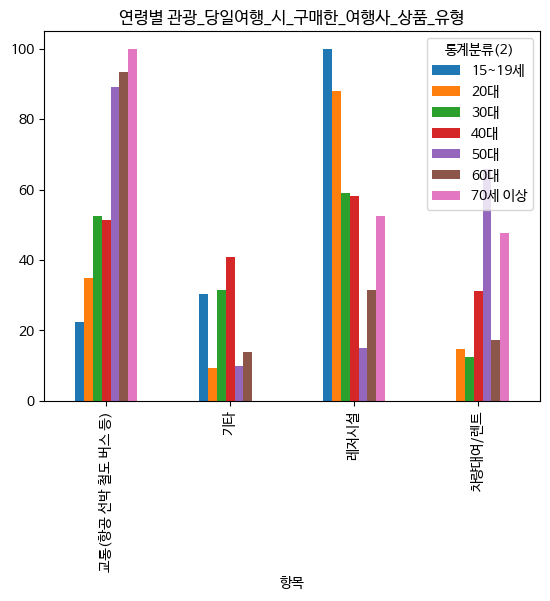

In [6]:
result.plot(kind='bar')
plt.title("연령별 관광_당일여행_시_구매한_여행사_상품_유형")

- 당일 여행의 경우 당연히 .... 숙박없음 교통이 가장 많음
- 차량대여에서 30대보다 40대가 2배이상 많음

In [7]:
item_cate = df_item_cate_day.query("`통계분류(1)` == '성별'")
grouped = item_cate.groupby(['항목', '통계분류(2)'])
result = grouped['데이터'].median().unstack()
result

통계분류(2),남자,여자
항목,,
교통(항공 선박 철도 버스 등),29.60,51.6
기타,15.40,9.9
레저시설,72.20,32.7
차량대여/렌트,12.45,15.2


Text(0.5, 1.0, '성별별 관광_당일여행_시_구매한_여행사_상품_유형')

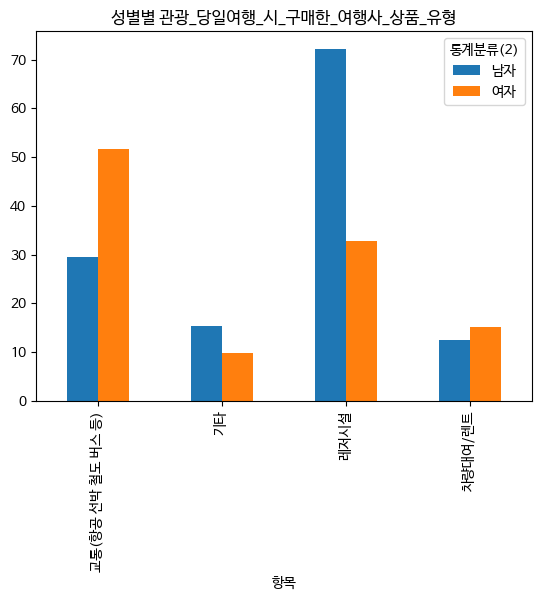

In [8]:
result.plot(kind='bar')
plt.title("성별별 관광_당일여행_시_구매한_여행사_상품_유형")

- 당일여행에서는 교통이 여성이 더 많이 나타나고
- 레저시설의 경우 여성보다 남성이 2배이상 많이 나타남

Text(0.5, 1.0, '연도별 관광_당일여행_시_구매한_여행사_상품_유형')

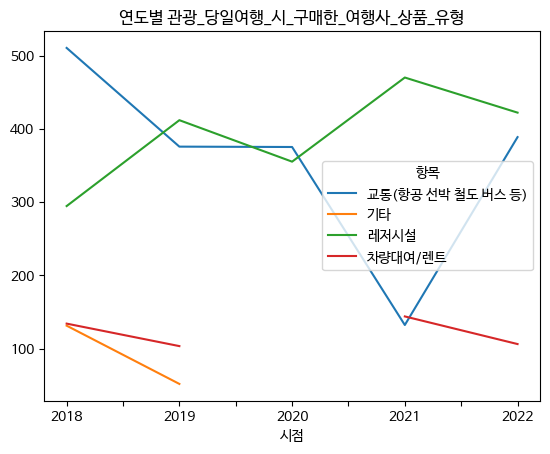

In [18]:
df_item_cate_day['시점'] = df_item_cate_day['시점'].astype(str)
grouped = df_item_cate_day.groupby(['시점', '항목'])
result = grouped['데이터'].sum().unstack()
result.plot(kind='line')
plt.title("연도별 관광_당일여행_시_구매한_여행사_상품_유형")

- 숙박 여행에서는 레저시설이 가장 적게 나타났는데 당일여행에서는 높게 나타남!!


## 관광_당일여행_사전예약_유형

In [26]:
df_reservation_cate_day

,통계분류(1),통계분류(2),시점,항목,데이터
0,성별,남자,2018,교통수단(항공 선박 철도 버스 등),36.6
1,성별,남자,2018,레저시설(놀이시설 스파 스키장 골프장 등),20.8
2,성별,남자,2018,식당,26.3
3,성별,남자,2018,관광명소(유적지 국립공원 등),11.9
4,성별,남자,2018,차량대여/렌트,29.5
...,...,...,...,...,...
327,연령,70세 이상,2022,식당,2.5
328,연령,70세 이상,2022,관광명소(유적지 국립공원 등),1.0
329,연령,70세 이상,2022,차량대여/렌트,1.3
330,연령,70세 이상,2022,체험 프로그램(농어촌 체험 생태체험 학습 등),0.1


In [12]:
item_cate = df_reservation_cate_day.query("`통계분류(1)` == '연령'")
grouped = item_cate.groupby(['항목', '통계분류(2)'])
result = grouped['데이터'].median().unstack()
result

통계분류(2),15~19세,20대,30대,40대,50대,60대,70세 이상
항목,,,,,,,
관광명소(유적지 국립공원 등),2.35,0.6,0.6,0.7,0.6,0.50,1.0
교통수단(항공 선박 철도 버스 등),7.90,5.6,2.2,1.0,1.2,2.00,1.6
기타,1.40,0.5,0.3,0.3,0.1,0.90,1.5
레저시설(놀이시설 스파 스키장 골프장 등),4.70,2.2,1.8,2.1,2.0,1.60,0.7
사전 예약하지 않았음,87.80,91.6,94.5,95.0,95.0,94.10,93.9
식당,1.50,0.8,1.3,1.6,2.7,3.20,3.9
차량대여/렌트,4.60,0.9,0.2,0.3,0.2,0.70,1.3
체험 프로그램(농어촌 체험 생태체험 학습 등),3.00,0.2,0.6,0.5,0.2,0.85,2.4


Text(0.5, 1.0, '연령별 관광_당일여행_사전예약_유형')

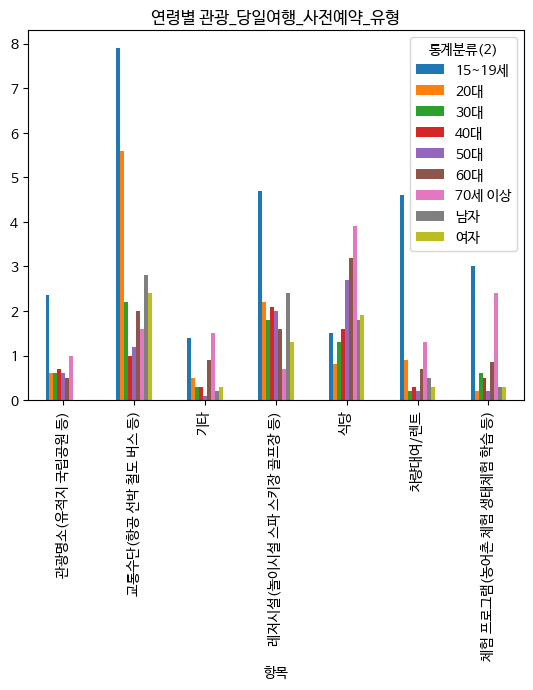

In [4]:
item_cate = df_reservation_cate_day.query("`통계분류(1)` == '연령' and 항목 == '관광명소(유적지 국립공원 등)' or 항목 == '교통수단(항공 선박 철도 버스 등)' or 항목 == '기타' or 항목 == '레저시설(놀이시설 스파 스키장 골프장 등)' or 항목 == '식당' or 항목 == '차량대여/렌트' or 항목 == '체험 프로그램(농어촌 체험 생태체험 학습 등)' or 항목 == '숙박시설(호텔 콘도미니엄/ 리조트 펜션 유스호스텔 등)'")
grouped = item_cate.groupby(['항목', '통계분류(2)'])
result = grouped['데이터'].median().unstack()

result.plot(kind='bar')
plt.title("연령별 관광_당일여행_사전예약_유형")

Text(0.5, 1.0, '연령별 관광_당일여행_사전예약_유형')

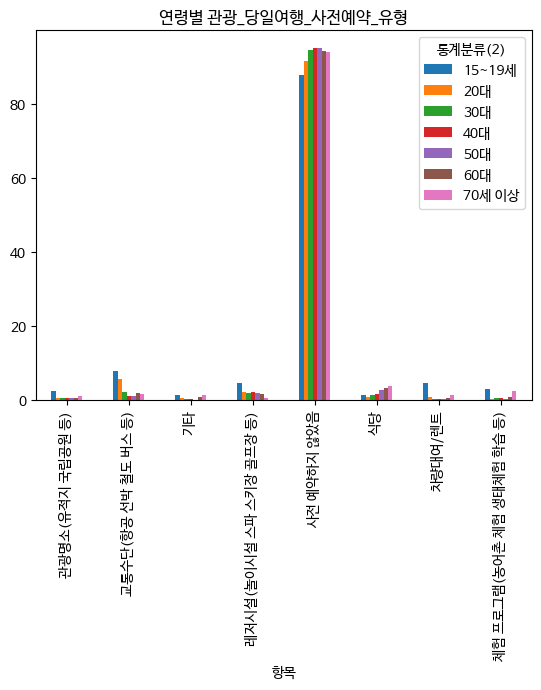

In [13]:
result.plot(kind='bar')
plt.title("연령별 관광_당일여행_사전예약_유형")

Text(0.5, 1.0, '사전예약하지 않음 연령별 비교')

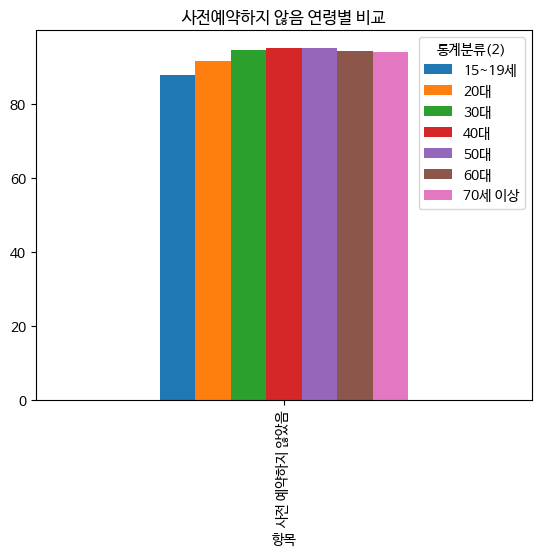

In [61]:
no_reservation = df_reservation_cate_day.query("항목 == '사전 예약하지 않았음' and `통계분류(1)` == '연령'")

grouped = no_reservation.groupby(['항목', '통계분류(2)'])
result = grouped['데이터'].median().unstack()
result.plot(kind='bar')
plt.title("사전예약하지 않음 연령별 비교")

In [13]:
item_cate = df_reservation_cate_day.query("`통계분류(1)` == '성별'")
item_cate = item_cate.query("항목 == '관광명소(유적지 국립공원 등)' or 항목 == '교통수단(항공 선박 철도 버스 등)' or 항목 == '기타' or 항목 == '레저시설(놀이시설 스파 스키장 골프장 등)' or 항목 == '식당' or 항목 == '차량대여/렌트' or 항목 == '체험 프로그램(농어촌 체험 생태체험 학습 등)' or 항목 == '숙박시설(호텔 콘도미니엄/ 리조트 펜션 유스호스텔 등)'")

grouped = item_cate.groupby(['항목', '통계분류(2)'])
result = grouped['데이터'].median().unstack()
result

통계분류(2),남자,여자
항목,,
관광명소(유적지 국립공원 등),0.5,0.7
교통수단(항공 선박 철도 버스 등),2.8,2.4
기타,0.2,0.3
레저시설(놀이시설 스파 스키장 골프장 등),2.4,1.3
식당,1.8,1.9
차량대여/렌트,0.5,0.3
체험 프로그램(농어촌 체험 생태체험 학습 등),0.3,0.3


Text(0.5, 1.0, '성별별 관광_당일여행_사전예약_유형')

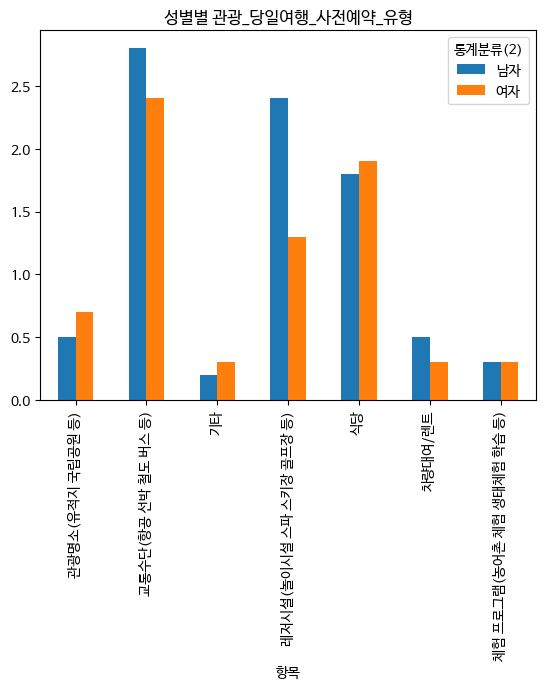

In [14]:
result.plot(kind='bar')
plt.title("성별별 관광_당일여행_사전예약_유형")

In [27]:
year_2020 = df_reservation_cate_day.query("시점 == 2020 or 시점 == 2021 or 시점 == 2022")
grouped = year_2020.groupby(['시점', '항목'])
result = grouped['데이터'].sum().unstack()
result

항목,관광명소(유적지 국립공원 등),교통수단(항공 선박 철도 버스 등),기타,레저시설(놀이시설 스파 스키장 골프장 등),사전 예약하지 않았음,식당,차량대여/렌트,체험 프로그램(농어촌 체험 생태체험 학습 등)
시점,,,,,,,,
2020,3.9,26.4,1.7,15.0,833.3,18.1,3.1,2.4
2021,3.4,14.0,1.4,13.7,854.7,12.4,1.5,1.6
2022,5.5,20.0,2.8,17.8,840.0,10.1,4.3,3.1


Text(0.5, 1.0, '연도별 관광_당일여행_사전예약_유형')

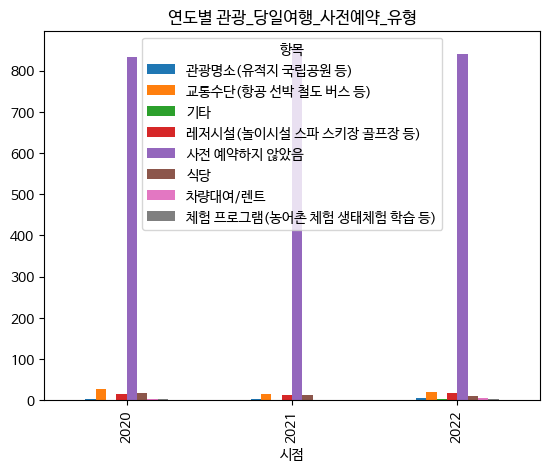

In [28]:
result.plot(kind='bar')
plt.title("연도별 관광_당일여행_사전예약_유형")

- 2018년~2019년에는 사전예약하지않았음 이라는 선택지가 없었나봄
- 

In [26]:
df_reservation_cate_day['시점'] = df_reservation_cate_day['시점'].astype(str)
year = df_reservation_cate_day.query("시점 == '2020' or 시점 == '2021' or 시점 == '2022'")
no_reservation = year.query("항목 == '관광명소(유적지 국립공원 등)' or 항목 == '교통수단(항공 선박 철도 버스 등)' or 항목 == '기타' or 항목 == '레저시설(놀이시설 스파 스키장 골프장 등)' or 항목 == '식당' or 항목 == '차량대여/렌트' or 항목 == '체험 프로그램(농어촌 체험 생태체험 학습 등)' or 항목 == '숙박시설(호텔 콘도미니엄/ 리조트 펜션 유스호스텔 등)'")
grouped = no_reservation.groupby(['시점', '항목'])
result = grouped['데이터'].sum().unstack()
result

항목,관광명소(유적지 국립공원 등),교통수단(항공 선박 철도 버스 등),기타,레저시설(놀이시설 스파 스키장 골프장 등),식당,차량대여/렌트,체험 프로그램(농어촌 체험 생태체험 학습 등)
시점,,,,,,,
2020,3.9,26.4,1.7,15.0,18.1,3.1,2.4
2021,3.4,14.0,1.4,13.7,12.4,1.5,1.6
2022,5.5,20.0,2.8,17.8,10.1,4.3,3.1


Text(0.5, 1.0, '연도별 관광_당일여행_사전예약_유형')

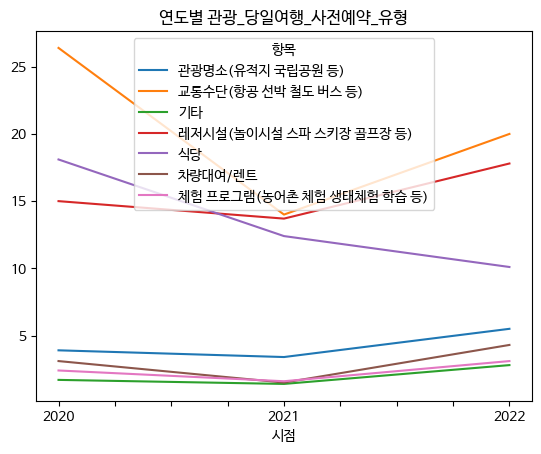

In [27]:
result.plot(kind='line')
plt.title("연도별 관광_당일여행_사전예약_유형")